__Universidade Federal do Pará  
  Disciplina: Tópicos Especiais em Inteligência Artificial  
  Docente: Claudomiro Sales  
  Discente: Hiago Cavalcante Prata  
  Matrícula: 201406840049__

---

### Atividade 02: Título

[1. Introdução](#1.-Introdução)  
[2. Testes](#2.-Testes)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Teste 1](#2.1.-Teste-1)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Teste 2](#2.2.-Teste-2)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Teste 3](#2.3.-Teste-3)  
[3. Baseline](#3.-Baseline)  
[4. Hipóteses](#4.-Hipóteses)  
[5. Resultados](#5.-Resultados)  
[6. Considerações Finais](#6.-Considerações-Finais)  

---

## 1. Introdução

In [51]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as pl

def target(wsize, alphabet):
    return np.random.choice(alphabet, wsize)

class Chromosome:

    genes = []
    fitness = 0

    def __init__(self, size, alphabet):
        self.genes = np.random.choice(alphabet, size) 

    def __str__(self):
        return "{0}".format(self.genes)

    def _fitness(self, target):
        hits = 0
        for i, j in zip(self.genes, target):
            if i == j:
                hits += 1
        self.fitness = (hits*100)/len(target)

class Population:

    def __init__(self, psize, csize, alphabet):
        self.alphabet = alphabet
        self.psize = psize
        self.csize = csize
        self.population = self._gen_pop(psize, csize, alphabet)
        
    def __str__(self):
        return "\n".join(map(str,self.population))

    def sort(self):
        self.population = sorted(self.population, key=lambda chromosome: chromosome.fitness)

    def renew(self):
        index = int(len(self.population)/2)
        self.population = self._gen_pop(index, self.csize, self.alphabet) + self.population[index:]
    
    def _gen_pop(self, psize, csize, alphabet):
        pop = []
        for _ in range(psize):
            pop.append(Chromosome(csize, self.alphabet))
        return pop

class Randomwalk(Population):
    
    best_scores = []
    
    def __init__(self, psize, alphabet, target, gcounter, tcounter = 5):
        self.alphabet = alphabet
        self.target = target
        self.psize = psize
        self.csize = len(self.target)
        self.gcounter = gcounter
        self.tcounter = tcounter 
        self.population = self._gen_pop(self.psize, self.csize, self.alphabet)
        self.update(self.target)

    def renew(self):
        index = int(len(self.population)/2)
        self.population = self._gen_pop(index, self.csize, self.alphabet) + self.population[index:]
        self.update(self.target)

    def update(self, target):
        for i in range(len(self.population)):
            self.population[i]._fitness(self.target)    

    def get_fitness(self):
        return [self.population[i].fitness for i in range(len(self.population))]

    def run(self):
        self.best_scores = []
        
        for _ in range(self.tcounter):
            
            self.scores = []
            
            for _ in range(self.gcounter):
                self.sort()
                self.renew()
                self.sort()
                
                self.scores.append(self.get_fitness()[-1])
            
            self.best_scores.append(self.scores)
            
    def plot(self):
        self.bs = np.array(self.best_scores)
        self.m = np.mean(self.bs, axis=0) 
        self.std = np.std(self.bs, axis=0)
        self.idx = np.arange(1, self.gcounter, 10)
        
        pl.figure(figsize=(15, 10))
        pl.title(u"Média de Acertos por Geração")
        pl.xlabel(u"Gerações")
        pl.ylabel(u"Acerto(%)")
        pl.grid(alpha=0.3)
        pl.errorbar(self.idx, self.m[::10], self.std[::10], ls=None, marker='.')
        pl.show()

---

## 2. Testes  



Para se obter informações de onde possamos tirar conclusões sobre o algorítimo apresentado, se faz necessária a realização de alguns testes, utilizando algumas variáveis como parâmetros. Nesse caso, temos temos 4 variáveis: tamanho da população (`psize`), tamanho da palavra alvo (`wsize`), número de testes (`tcounter`) e o número de gerações (`gcounter`).

Os testes a seguir foram organizado em cenários que destacam apenas uma das quatro variáveis por vez, mantendo as restantes em estado constante. No entanto, para o escopo deste estudo, apenas duas dessas variáveis são alteradas, `psize` e `wsize`. As variáveis se alternam como na tabela abaixo:

| psize 	| wsize 	| gcounter 	| tcounter 	|
|:-----:	|:-----:	|:--------:	|:--------:	|
| 20 	| 20 	| 1000 	| 10 	|
| 100 	| 20 	| 1000 	| 10 	|
| 500 	| 20 	| 1000 	| 10 	|
| 1000 	| 20 	| 1000 	| 10 	|
| 20 	| 30 	| 1000 	| 10 	|
| 100 	| 30 	| 1000 	| 10 	|
| 500 	| 30 	| 1000 	| 10 	|
| 1000 	| 30 	| 1000 	| 10 	|
| 20 	| 40 	| 1000 	| 10 	|
| 100 	| 40 	| 1000 	| 10 	|
| 500 	| 40 	| 1000 	| 10 	|
| 1000 	| 40 	| 1000 	| 10 	|

As quatro primeiras linhas da tabela são referentes aos cenários utilizados para o primeiro teste. As quatro linhas seguintes foram utilizadas para o segunto teste. As últimas quatro linhas são usadas para o teste 3.

In [52]:
t1 = target(20, [0, 1])
t2 = target(30, [0, 1])
t3 = target(40, [0, 1])

psize1  = 20
psize2  = 100
psize3  = 500
psize4  = 1000

gcount = 1000

### 2.1. Teste 1


In [53]:
r11 = Randomwalk(psize=psize1, alphabet=[0,1], target=t1, gcounter=gcount, tcounter=10)
r12 = Randomwalk(psize=psize2, alphabet=[0,1], target=t1, gcounter=gcount, tcounter=10)
r13 = Randomwalk(psize=psize3, alphabet=[0,1], target=t1, gcounter=gcount, tcounter=10)
r14 = Randomwalk(psize=psize4, alphabet=[0,1], target=t1, gcounter=gcount, tcounter=10)

#### População: 20 indivíduos | Palavra alvo: 20 genes

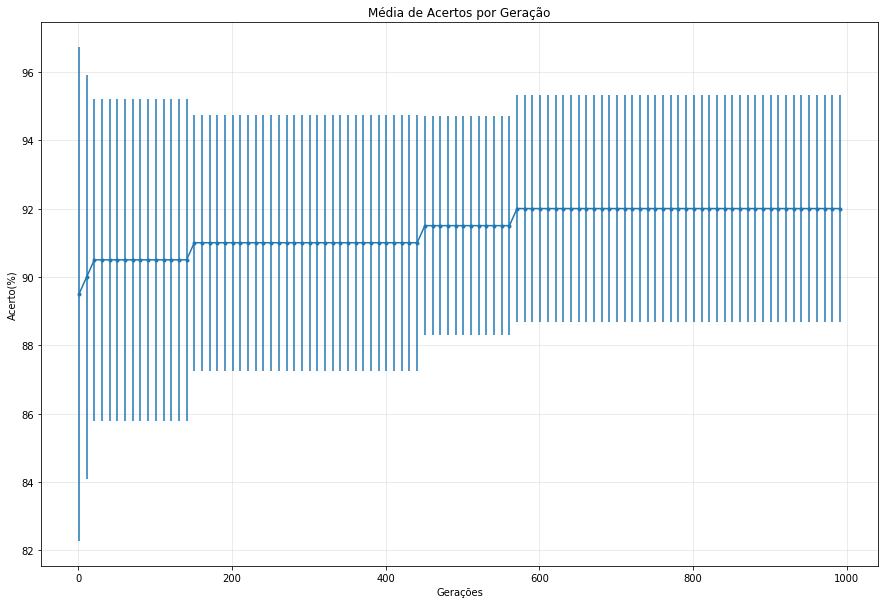

In [54]:
r11.run()
r11.plot()

#### População: 100 indivíduos | Palavra alvo: 20 genes

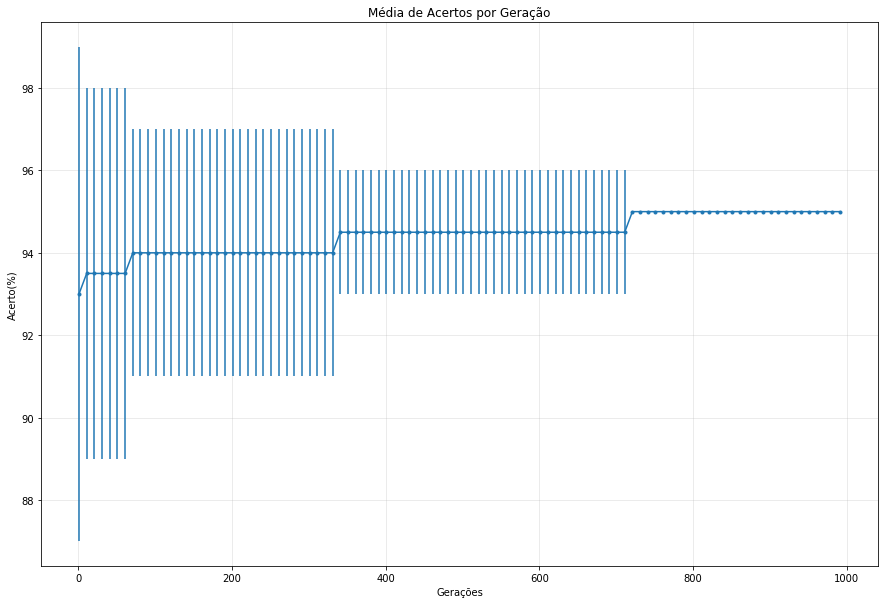

In [55]:
r12.run()
r12.plot()

#### População: 500 indivíduos | Palavra alvo: 20 genes

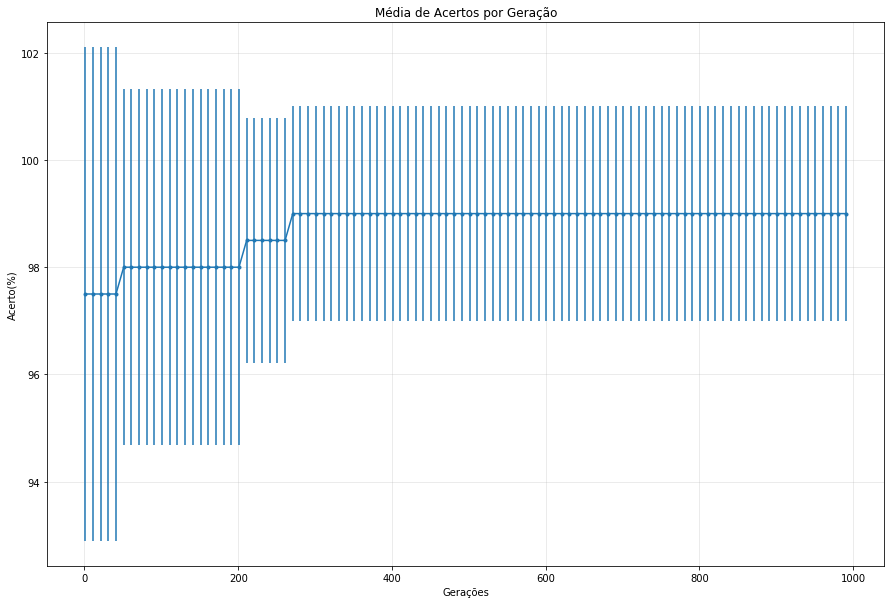

In [56]:
r13.run()
r13.plot()

#### População: 1000 indivíduos | Palavra alvo: 20 genes

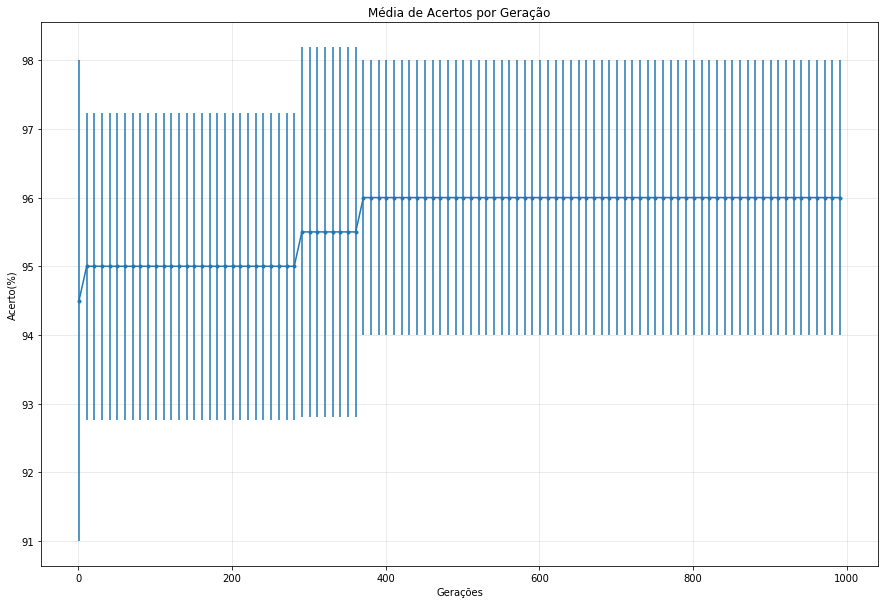

In [57]:
r14.run()
r14.plot()

---

### 2.2. Teste 2

In [58]:
r21 = Randomwalk(psize=psize1, alphabet=[0,1], target=t2, gcounter=gcount, tcounter=10)
r22 = Randomwalk(psize=psize2, alphabet=[0,1], target=t2, gcounter=gcount, tcounter=10)
r23 = Randomwalk(psize=psize3, alphabet=[0,1], target=t2, gcounter=gcount, tcounter=10)
r24 = Randomwalk(psize=psize4, alphabet=[0,1], target=t2, gcounter=gcount, tcounter=10)

#### População: 20 indivíduos | Palavra alvo: 30 genes

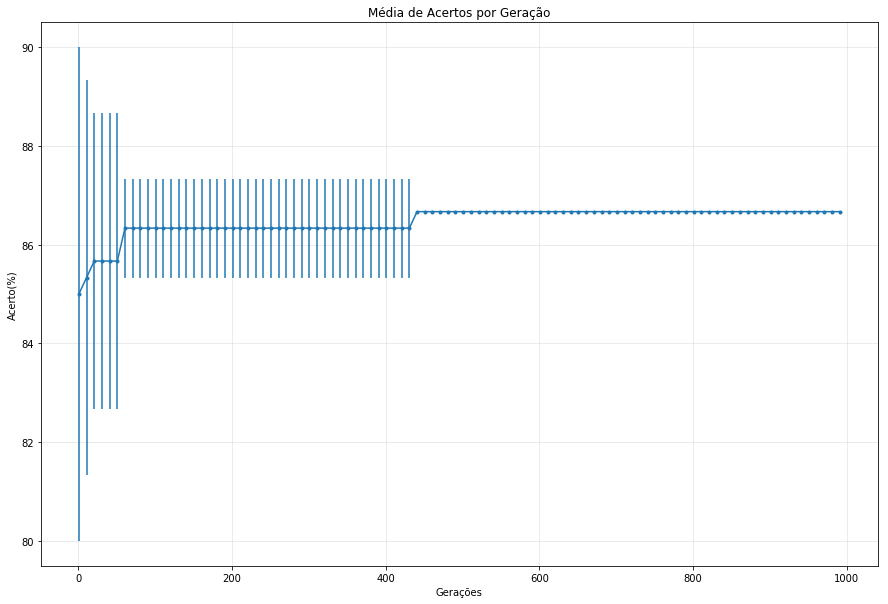

In [59]:
r21.run()
r21.plot()

#### População: 100 indivíduos | Palavra alvo: 30 genes

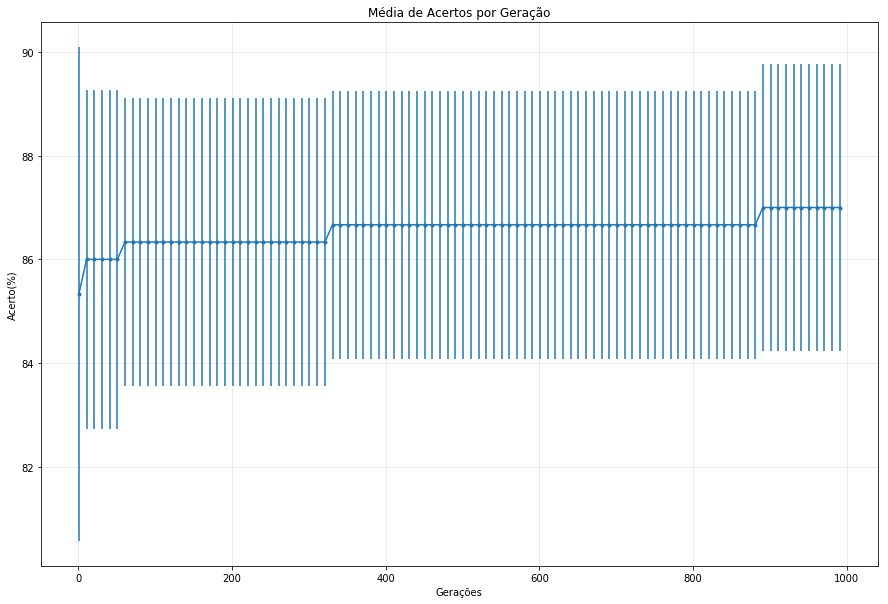

In [60]:
r22.run()
r22.plot()

#### População: 500 indivíduos | Palavra alvo: 30 genes

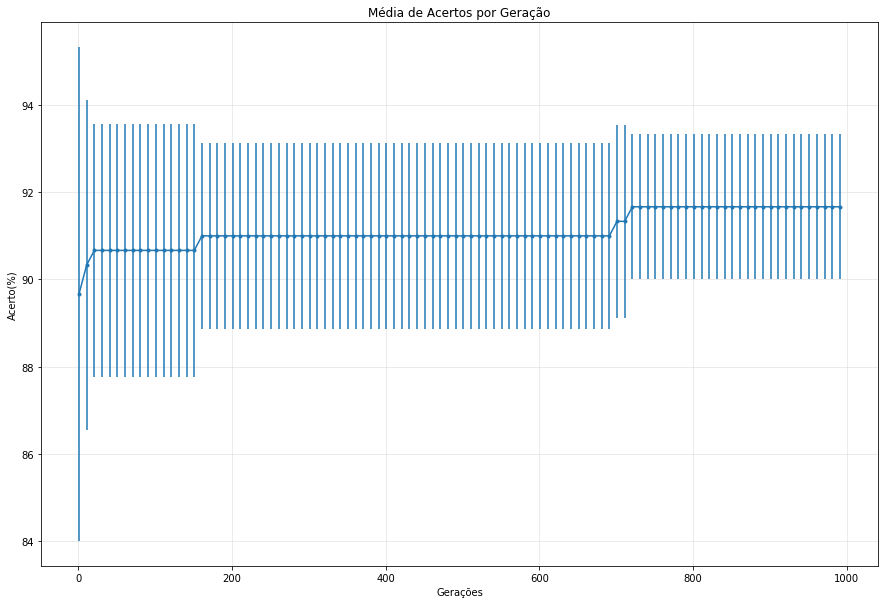

In [61]:
r23.run()
r23.plot()

#### População: 1000 indivíduos | Palavra alvo: 30 genes

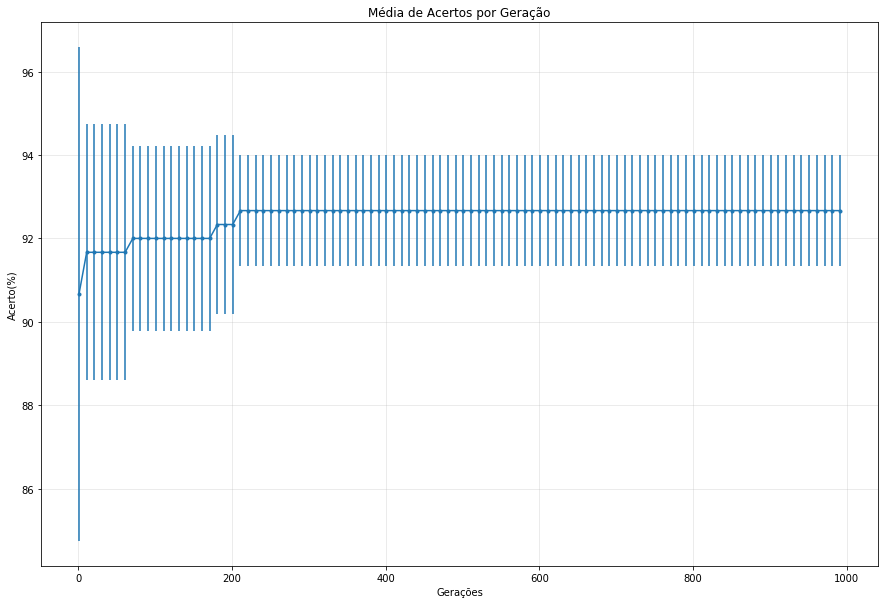

In [62]:
r24.run()
r24.plot()

---

### 2.3. Teste 3

In [63]:
r31 = Randomwalk(psize=psize1, alphabet=[0,1], target=t3, gcounter=gcount, tcounter=10)
r32 = Randomwalk(psize=psize2, alphabet=[0,1], target=t3, gcounter=gcount, tcounter=10)
r33 = Randomwalk(psize=psize3, alphabet=[0,1], target=t3, gcounter=gcount, tcounter=10)
r34 = Randomwalk(psize=psize4, alphabet=[0,1], target=t3, gcounter=gcount, tcounter=10)

#### População: 20 indivíduos | Palavra alvo: 40 genes

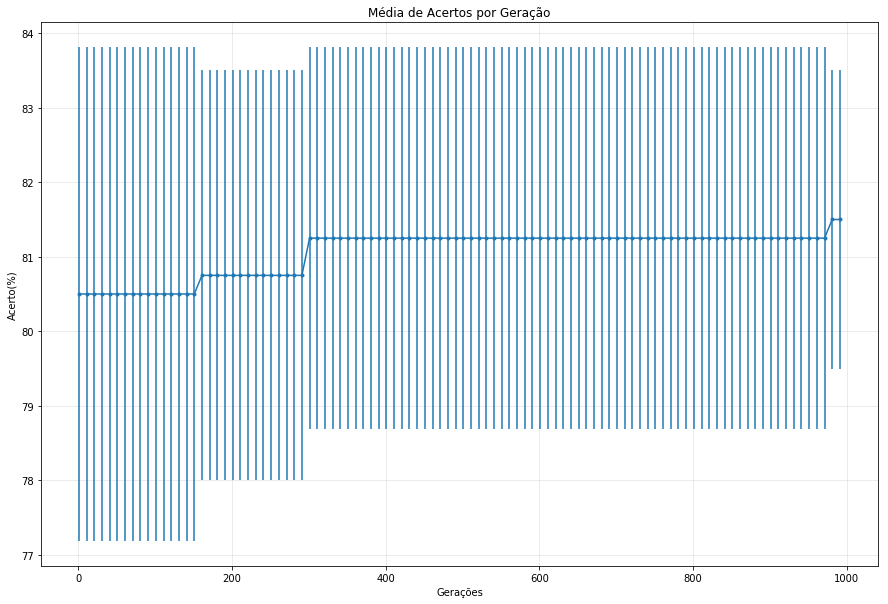

In [64]:
r31.run()
r31.plot()

#### População: 100 indivíduos | Palavra alvo: 40 genes

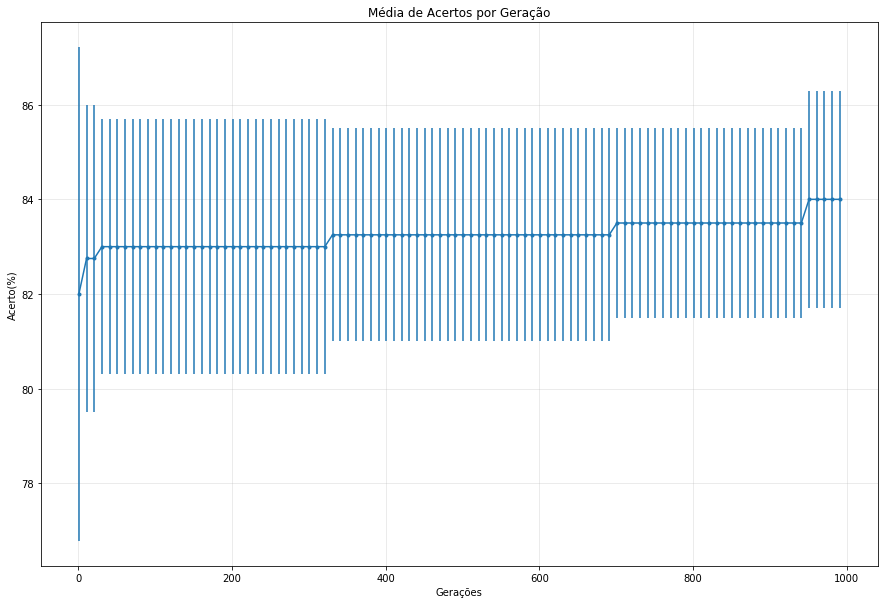

In [65]:
r32.run()
r32.plot()

#### População: 500 indivíduos | Palavra alvo: 40 genes

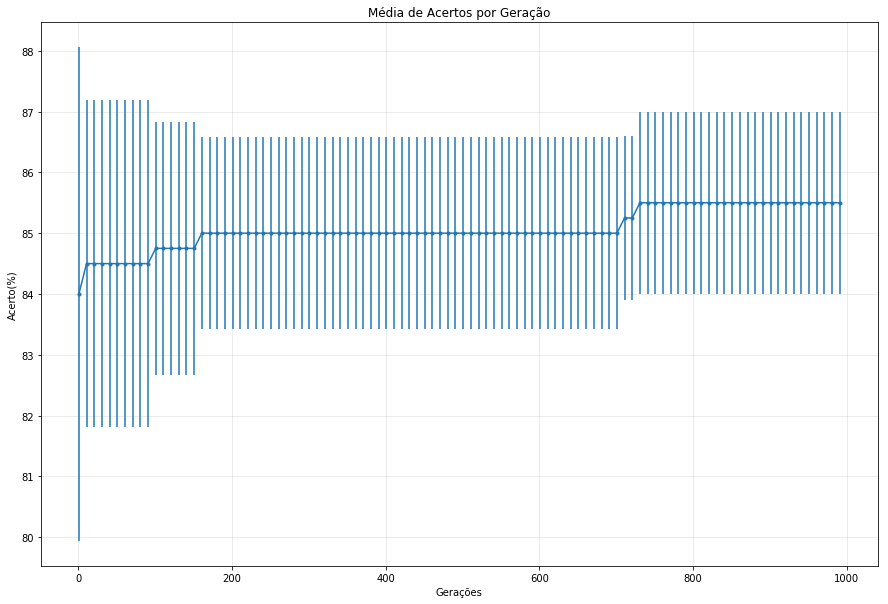

In [66]:
r33.run()
r33.plot()

#### População: 1000 indivíduos | Palavra alvo: 40 genes

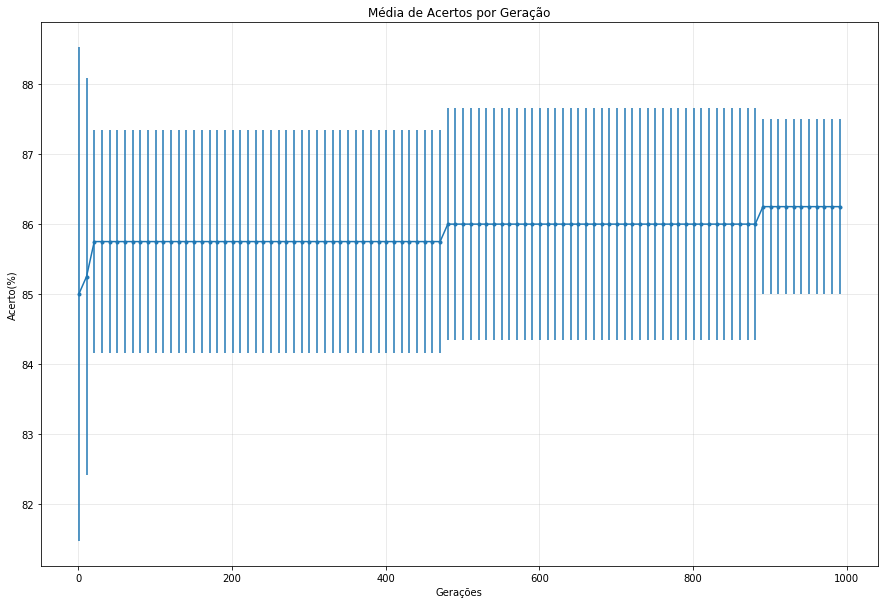

In [67]:
r34.run()
r34.plot()

---

## 3. Baseline  



---

## 4. Hipóteses  


Com base nos experimentos aplicados anteriormente, podemos levantar hipóteses a respeito da eficácia do método heurístico aplicado:

1. Por se tratar de um método de caráter puramente randômico, não é possível afirmar que a solução para o problema será encontrada;
2. 
3. 

---

In [167]:
b = r14.best_scores[][0:]
#bs = np.std(b, axis=1)
#bm = np.mean(b, axis=1)

print(len(b))
print(b)

1000
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 

## 5. Resultados  


[ 82.5  87.5  87.5  87.5] [ 0.  0.  0.  0.]


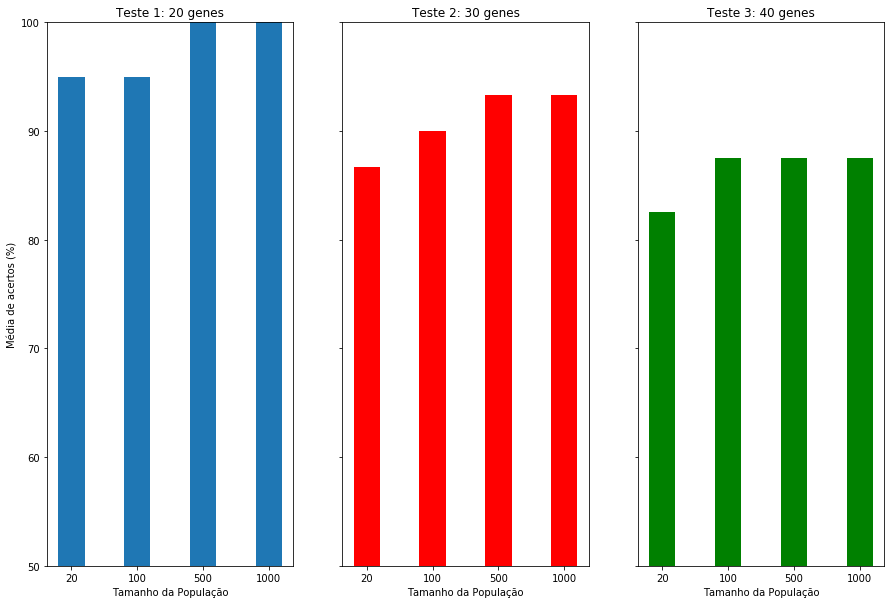

In [121]:
lb = ["20", "100", "500", "1000"]
index  = np.arange(1, 5, 1)
width  = 0.35

a1 = [ r11.best_scores[:][-1], r12.best_scores[:][-1], r13.best_scores[:][-1], r14.best_scores[:][-1] ]
a2 = [ r21.best_scores[:][-1], r22.best_scores[:][-1], r23.best_scores[:][-1], r24.best_scores[:][-1] ]
a3 = [ r31.best_scores[:][-1], r32.best_scores[:][-1], r33.best_scores[:][-1], r34.best_scores[:][-1] ]

m1 = np.mean(a1, axis=1)
std1 = np.std(a1, axis=1)

m2 = np.mean(a2, axis=1)
std2 = np.std(a2, axis=1)

m3 = np.mean(a3, axis=1)
std3 = np.std(a3, axis=1)

fig = pl.figure(figsize=(15, 10)) 
ax1 = pl.subplot(1, 3, 1)
ax2 = pl.subplot(1, 3, 2, sharey=ax1)
ax3 = pl.subplot(1, 3, 3, sharey=ax1)

ax1.bar(index, m1, yerr=std1, width=0.4)
ax1.set_xticks(index)
ax1.set_xticklabels(labels=lb)
ax1.set_title(u"Teste 1: 20 genes")
ax1.set_xlabel(u"Tamanho da População")
ax1.set_ylabel(u"Média de acertos (%)")
pl.ylim(50, 100, 5)

ax2.bar(index, m2, yerr=std2, width=0.4, color='r')
ax2.set_xticks(index)
ax2.set_xticklabels(labels=lb)
ax2.set_title(u"Teste 2: 30 genes")
ax2.set_xlabel(u"Tamanho da População")
pl.setp(ax2.get_yticklabels(), visible=False)

ax3.bar(index, m3, yerr=std3, width=0.4, color='g')
ax3.set_xticks(index)
ax3.set_xticklabels(labels=lb)
ax3.set_title(u"Teste 3: 40 genes")
ax3.set_xlabel(u"Tamanho da População")
pl.setp(ax3.get_yticklabels(), visible=False)


pl.show()

---

## 6. Considerações Finais

